# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?

We predict our target using an intercept and features that are weighted based on how much they contribute to the target variable. Since the features are in vector format, the final weight to predict the target variable will be a linear combination of the features. The model is linear because a change in a feature would also lead to a change in the target prediction.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

Without an intercept, each coefficient represents the mean for that dependent variable. When we include the intercept, the coefficient represents the difference in the dummy/dependent variable's mean and the reference's mean.

3. Can linear regression be used for classification? Explain why, or why not.

Technically we could use linear regression for classification if we assigned groups based on where it falls on the model, for example, grouping based on if the prediction is greater than or less than a certain value. 

4. What are signs that your linear model is over-fitting?

If the feature space is complex and there are too many unique features, our model could work really well on the train data, but not generalize well on other data. Having too many features complicates the model and could add noise.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multicollinearity is when two or more independent variables in a regression model are highly correlated, making it harder to separate each variable's effect on the target variable. By using the two-stage least squares technique, we run regression using a feature that is closely related to ONE of the variables highly correlated to each other. Then, we will have predictions for that feature to use on the main regression. 

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?

If the relationship isn't linear, we can just add more degrees so that the regression can become curved and capture more of the patterns. We could also use log or exponentials depending on how the target grows in relation to the features. 

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The interpretation of the intercept is where the target variable lies when all the features are zero. The slope coeefficient for a variable shows how much that specific feature contributes to the target variable. The coefficient for a dummy/one-hot-encoded variable depends on if there is an intercept or not. If there is not an intercept, each coefficient represents the mean for that feature variable. If there is an intercept, the coefficient represents the difference between that dummy variable's mean and the reference's mean.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [2]:
data = pd.read_csv('./Q1_clean.csv')
data.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [3]:
data['Price'].groupby(data['Neighbourhood ']).mean()
# We can see that Manhattan is the most expensive.

Neighbourhood 
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64

In [4]:
data['Review Scores Rating'].groupby(data['Neighbourhood ']).mean()
# We can see that the scores are somewhat similar, though Brooklyn has the highest average score in this list.

Neighbourhood 
Bronx            91.654378
Brooklyn         92.363497
Manhattan        91.801496
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64

(0.0, 800.0)

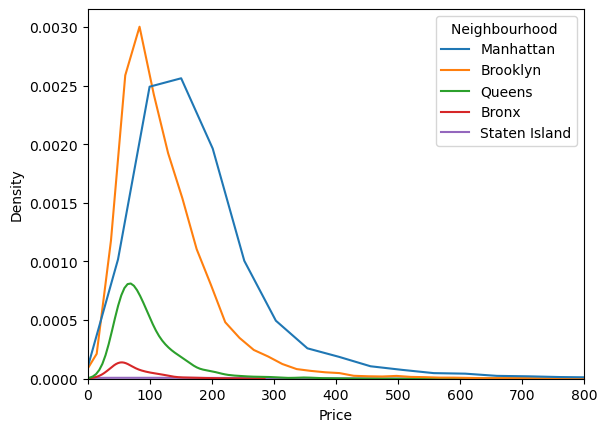

In [5]:
sns.kdeplot(data=data, x='Price', hue='Neighbourhood ')
plt.xlim(0, 800)

<Axes: xlabel='Price', ylabel='Density'>

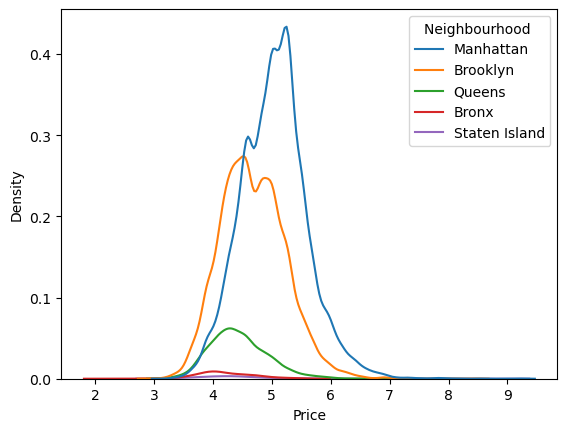

In [6]:
price_log = np.log(data['Price'])
sns.kdeplot( x=price_log, hue=data['Neighbourhood '])

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [7]:
X = pd.get_dummies(data['Neighbourhood '])
y = data['Price']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)

# We can see that the coefficients are the same as the prices grouped by neighborhood. Each coefficient represents the mean price for each neighborhood.

Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
dtype: float64


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [8]:
X = pd.get_dummies(data['Neighbourhood '], drop_first=True)
y = data['Price']
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
print(coefficients)
print(intercept)

# When creating dummies, we have to drop one category. The intercept is the mean price of the dropped category, which is Bronx.
# The coefficients are the distance of price from their respective neighborhood to the dropped neighborhood. 
# So, to get the coefficients from part 2, we add these new coefficients to the intercept.

Brooklyn          52.470881
Manhattan        108.387789
Queens            21.580735
Staten Island     70.890169
dtype: float64
75.2764976958471


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
y = data['Price']
vars = ['Review Scores Rating', 'Neighbourhood ']
X = data.loc[:,vars]
X = pd.get_dummies(X, columns=['Neighbourhood '], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(reg.coef_[0])
print(reg.coef_)


# The R^2 is .0823
# The coefficient on Review Scores Rating is 1.0275
# The largest value is 109, which corresponds to Queens.

0.08230721172544142
1.0275091578505746
[  1.02750916  52.04910635 109.3336238   21.62439234  88.97970347]


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [11]:
y = data['Price']
vars = ['Review Scores Rating', 'Neighbourhood ', 'Property Type']
X = data.loc[:,vars]
X = pd.get_dummies(X, columns=['Neighbourhood ', 'Property Type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(reg.coef_[0])
print(reg.coef_)

# The R^2 is .0853
# The RMSE is 106.113
# The coefficient on Review Scores Rating is 1.0168
# The most expensive would be a condo.

0.08534318021973553
106.11390582635056
1.0168113684217075
[   1.01681137   60.47317693  123.42997013   28.38299784   82.3286457
  -30.01664281   81.36450192   28.57319701   35.16739045  -15.56782596
  -41.08304917  -28.1094446   102.5068739   -49.65442857   36.09262338
 -134.98218096  -89.12625597   67.01091959   -7.44734694   86.58686941
  -76.87290706   34.58555853]


In [12]:
print(data['Price'].groupby(data['Property Type']).mean().sort_values(ascending=False))

Property Type
Condominium        241.229167
Townhouse          214.253012
Loft               203.571912
Other              178.928571
Treehouse          167.666667
Cabin              165.000000
Villa              154.000000
Apartment          153.928470
Boat               153.333333
Castle             150.000000
House              147.142399
Bungalow           143.666667
Bed & Breakfast    103.095588
Chalet              99.000000
Camper/RV           66.666667
Dorm                65.545455
Hut                 50.000000
Lighthouse          39.000000
Name: Price, dtype: float64


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The coefficient shows how much price changes based on a unit increase in the Review Scores Rating. For part 4 to part 5 since there are multiple features, it changes because the model now accounts for the combined effects of multiple features. So since it accounts for more and more features, the coeficients change because some variation in Price could be explained by the other features, but the coefficient only represents the unique change from that feature only.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [13]:
df = pd.read_csv('./cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


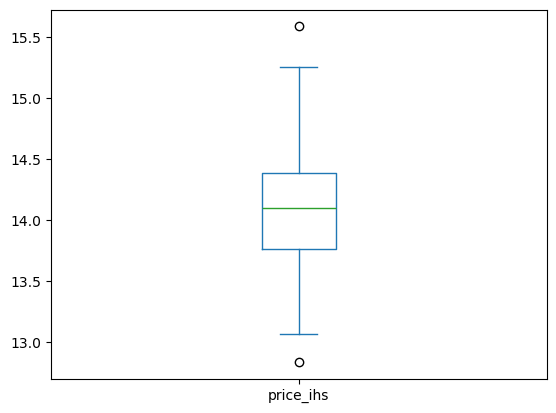

In [14]:
# arcsin so variables are on the same scale
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['price_ihs'].plot.box()
df = df.loc[(df['price_ihs'] > 13) & (df['price_ihs'] < 15.2), :] # get rid of outliers

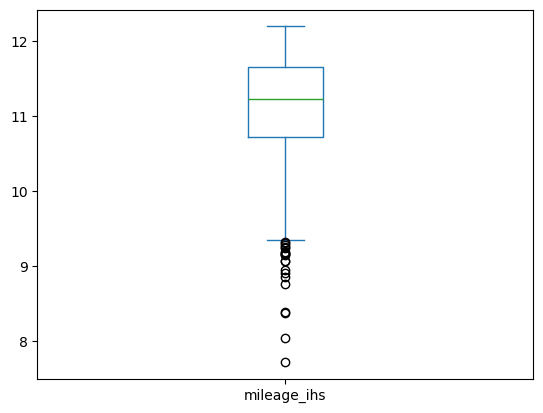

In [15]:
df['mileage_ihs'].plot.box()
df = df.loc[(df['mileage_ihs'] >= 9.2), :] # get rid of outliers

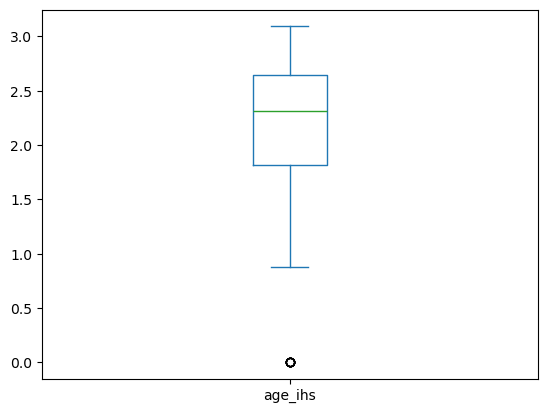

In [16]:
df['age'] = max(df['Make_Year'])-df['Make_Year']
df['age_ihs'] = np.arcsinh(df['age'])
df['age_ihs'].plot.box()
df = df.loc[df['age_ihs']>1,:]

2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

count    8.820000e+02
mean     7.189762e+05
std      3.419840e+05
min      2.370000e+05
25%      4.640000e+05
50%      6.510000e+05
75%      8.615000e+05
max      1.978000e+06
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Density'>

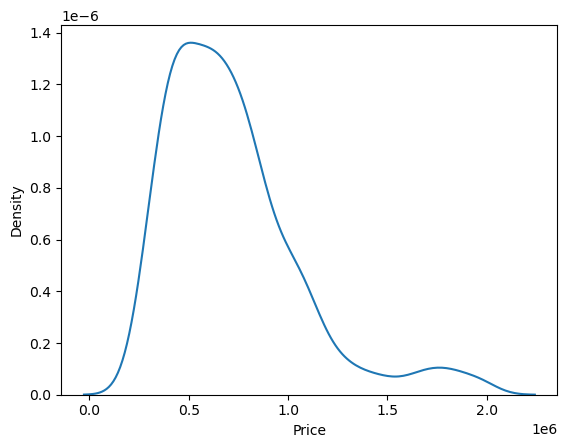

In [17]:
print(df['Price'].describe())
# I believe that there may be something wrong in the original dataset, at the Prices are showing up as superrrr high

sns.kdeplot(df['Price'])

               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            51.0  7.170392e+05  139109.447671   290000.0   635000.0   
Honda           70.0  7.779000e+05  246800.755760   316000.0   580250.0   
Hyundai        291.0  6.781168e+05  271469.360864   248000.0   473500.0   
Jeep             4.0  1.499500e+06  152513.387391  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  119056.709177  1369000.0  1579000.0   
MG Motors       27.0  1.830333e+06  110937.959100  1589000.0  1767000.0   
Mahindra        18.0  1.100167e+06  175549.305961   796000.0  1037000.0   
Maruti Suzuki  264.0  5.827273e+05  217558.176859   237000.0   405000.0   
Nissan           1.0  4.750000e+05            NaN   475000.0   475000.0   
Renault         50.0  6.4

/var/folders/y3/qpldbqrx2dn72lflj336s6l00000gn/T/ipykernel_51336/3677885605.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Price', hue='Make')


<Axes: xlabel='Price', ylabel='Density'>

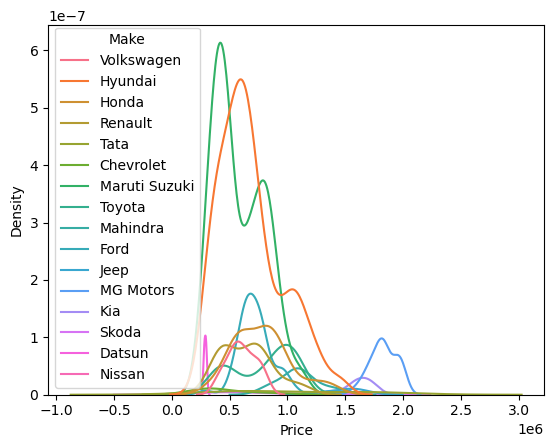

In [18]:
print(df['Price'].groupby(df['Make']).describe())
sns.kdeplot(data=df, x='Price', hue='Make')

# MG Motors seems to be the most expensive brand. Most of the prices are located near the 500000 range.


3. Split the data into an 80% training set and a 20% testing set.

In [19]:
y = df['Price']
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [20]:
y = df['Price']
vars = ['age_ihs', 'mileage_ihs', 'Seating_Capacity']
X = df.loc[:,vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))


# R^2 on the training set is 0.37
# R^2 on the testing set is 0.33
# RMSE is on the training set is 264283.47
# RMSE is on the testing set is 302367.97

0.37429465570135134
0.3258197083140605
264283.471202084
302367.96827799344


In [21]:
y = df['Price']
vars = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X = df.loc[:,vars]
X = pd.get_dummies(X, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
reg = LinearRegression().fit(X_train, y_train)
y_test_pred = reg.predict(X_test)

print(r2_score(y_test, y_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# R^2 on the testing set is 0.78
# RMSE is on the testing set is 174136.24
# This categorical model explains more of the variation in price. It also has a lower RMSE which means the predictions are closer to the actual values. 
# Thus, the categorical model performs better on the test set.


0.776394326975556
174136.240585909


In [22]:
y = df['Price']
vars = ['age_ihs', 'mileage_ihs', 'Seating_Capacity', 'Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X = df.loc[:,vars]
X = pd.get_dummies(X, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
reg = LinearRegression().fit(X_train, y_train)
y_test_pred = reg.predict(X_test)

print(r2_score(y_test, y_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# R^2 on the testing set is 0.85
# RMSE is on the testing set is 143825.98
# The joint model performs the best out of all 3! It performs much better than the numerical one and slighty better than the categorical one. 
# The joint model explains about 7 more points of the variation on a scale of 100. Its error is also lower.

0.8474616083849086
143825.978323476


5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
y = df['Price']
vars = ['age_ihs', 'mileage_ihs', 'Seating_Capacity']
X = df.loc[:,vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

for deg in range(1, 10):
    expander = PolynomialFeatures(degree=deg,include_bias=False)
    Z_train = expander.fit_transform(X_train)
    Z_test = expander.fit_transform(X_test)

    names = expander.get_feature_names_out()
    #zdf = pd.DataFrame(data=Z, columns = names)

    reg = LinearRegression().fit(Z_train, y_train)
    y_train_pred = reg.predict(Z_train)
    y_test_pred = reg.predict(Z_test)

    print(deg)
    #print(r2_score(y_train, y_train_pred))
    print(r2_score(y_test, y_test_pred))
    #print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    
# As the degree increases, R^2 increases until degree 4, and then sharply decreases. This shows that the model explains more of the variation in price, 
# but decreases after a certain point. For RMSE, it decreases until degree 4, and then sharply increases. This shows that 
# the predictions get closer to the actual values, but sharply turns at degree 6. R^2 goes negative at degree 6. 

# The best model was the mix of numerical and categorical variables.
    # R^2 = 0.8474616083849086
    # RMSE = 143825.978323476
# This model performs worse than my best model.


1
0.3258197083140595
302367.9682779936
2
0.3447164692117114
298100.2786028408
3
0.36217398834981585
294102.60326303606
4
0.36001000518239445
294601.08887729706
5
0.3271798819227384
302062.79725534003
6
-0.07204566028997972
381289.1059765964
7
-1206.0334686736778
12794031.381397005
8
-18857.228514312097
50570611.18185119
9
-57063.66623961233
87969352.66789085


6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [27]:
# best model
y = df['Price']
vars = ['age_ihs', 'mileage_ihs', 'Seating_Capacity', 'Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X = df.loc[:,vars]
X = pd.get_dummies(X, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
reg = LinearRegression().fit(X_train, y_train)
y_test_pred = reg.predict(X_test)

print(r2_score(y_test, y_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

0.8474616083849086
143825.978323476


Text(0, 0.5, 'Predicted Prices')

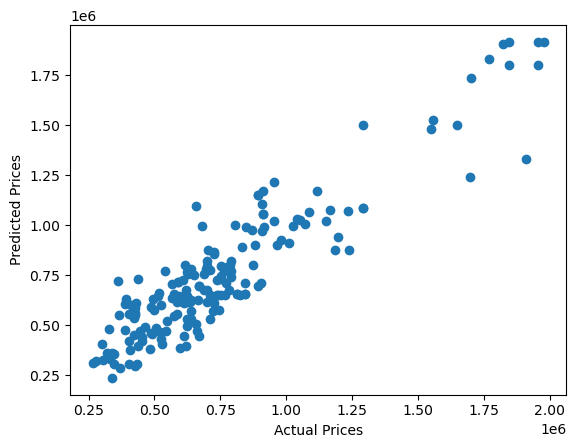

In [28]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Do the predicted values and true values roughly line up along the diagonal, or not?
# Yes, the predicted and true values roughly line up along the diagonal. This model captures the general trends well.

<Axes: xlabel='Price', ylabel='Density'>

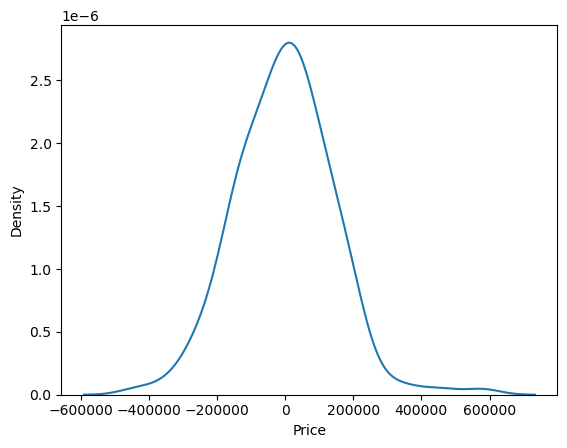

In [29]:
residuals = y_test - y_test_pred
sns.kdeplot(residuals)
# Yes, the residuals line up around zero. The errors are normally distributed.
# I think the model captures trends well and the errors are well distributed. I would be a little worried about overfit since I did include
# many features in the feature space, so I hope the model did not capture too many unique details.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
